In [13]:
%env KERAS_BACKEND = tensorflow

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential,Model
from keras.layers import Dense,Activation,Input,Lambda,concatenate
from keras.optimizers import SGD

from keras.datasets import mnist
from keras.utils import np_utils

from keras import backend as K

env: KERAS_BACKEND=tensorflow


In [14]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [15]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

x_train = x_train/255
x_test = x_test/255

In [16]:
#Autoencoder
enc_1 = Dense(100,activation='sigmoid')
enc_2 = Dense(2,activation='sigmoid')

dec_2 = Dense(100,activation='sigmoid')
dec_1 = Dense(784,activation='sigmoid')

In [17]:
#第一個變數必定以Input函數來定義
x = Input(shape=(784,))

In [18]:
enc_x = enc_1(x)
h = enc_2(enc_x)

dec_x = dec_2(h)
x_reconstructed = dec_1(dec_x)

In [19]:
autoencoder = Model(x,x_reconstructed)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 202       
_________________________________________________________________
dense_11 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_12 (Dense)             (None, 784)               79184     
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


In [20]:
autoencoder.compile(loss='kullback_leibler_divergence',optimizer='Nadam')

In [22]:
autoencoder.fit(x_train,x_train,batch_size=32,epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 14s 231us/step - loss: -21.2474
Epoch 2/100
60000/60000 [==============================] - 12s 196us/step - loss: -22.0460
Epoch 3/100
60000/60000 [==============================] - 11s 179us/step - loss: -22.0491
Epoch 4/100
60000/60000 [==============================] - 11s 185us/step - loss: -22.0498
Epoch 5/100
60000/60000 [==============================] - 11s 183us/step - loss: -22.0500
Epoch 6/100
60000/60000 [==============================] - 14s 225us/step - loss: -22.0501
Epoch 7/100
60000/60000 [==============================] - 16s 268us/step - loss: -22.0501
Epoch 8/100
60000/60000 [==============================] - 13s 219us/step - loss: -22.0501
Epoch 9/100
60000/60000 [==============================] - 13s 213us/step - loss: -22.0501
Epoch 10/100
60000/60000 [==============================] - 12s 200us/step - loss: -22.0501
Epoch 11/100
60000/60000 [===============

60000/60000 [==============================] - 11s 181us/step - loss: -22.0501
Epoch 88/100
60000/60000 [==============================] - 10s 168us/step - loss: -22.0501
Epoch 89/100
60000/60000 [==============================] - 11s 181us/step - loss: -22.0501
Epoch 90/100
60000/60000 [==============================] - 11s 178us/step - loss: -22.0501
Epoch 91/100
60000/60000 [==============================] - 10s 168us/step - loss: -22.0501
Epoch 92/100
60000/60000 [==============================] - 11s 176us/step - loss: -22.0501
Epoch 93/100
60000/60000 [==============================] - 13s 220us/step - loss: -22.0501
Epoch 94/100
60000/60000 [==============================] - 14s 237us/step - loss: -22.0501
Epoch 95/100
60000/60000 [==============================] - 11s 180us/step - loss: -22.0501
Epoch 96/100
60000/60000 [==============================] - 11s 180us/step - loss: -22.0501
Epoch 97/100
60000/60000 [==============================] - 11s 176us/step - loss: -22.0501
E

In [24]:
Encoder = Model(x,h)
Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [25]:
#因為decoder是從h往後兩層，所以需定義一個同樣大小的input
h_input = Input(shape=(2,))

Decoder = Model(h_input,dec_1(dec_2(h_input)))
Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_12 (Dense)             (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [46]:
#視覺化encoder
idx = np.random.randint(x_train.shape[0])
print(" 第%d 圖的latent 表示為 %s" %(idx,Encoder.predict(x_train[idx:idx+1])))

 第57027 圖的latent 表示為 [[0.9999454 0.9999542]]


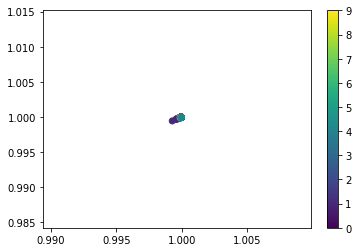

In [47]:
idices = np.random.randint(x_test.shape[0],size=1000)

latents = Encoder.predict(x_test[idices])
plt.scatter(latents[:,0],latents[:,1],c=y_test[idices])
plt.colorbar()
plt.show()

In [48]:
#視覺化decoder
n = 15
digit_size = 28
figure = np.zeros((digit_size*n,digit_size*n))
grid_x = np.linspace(0.05,0.95,n)
grid_y = np.linspace(0.05,0.95,n)

In [52]:
for i,yi in enumerate(grid_x):
    for j,xi in enumerate(grid_y):
        z_sample = np.array([[xi,yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size,digit_size)
        figure[(n-i-1)*digit_size:(n-i)*digit_size,j*digit_size:(j+1)*digit_size]=digit

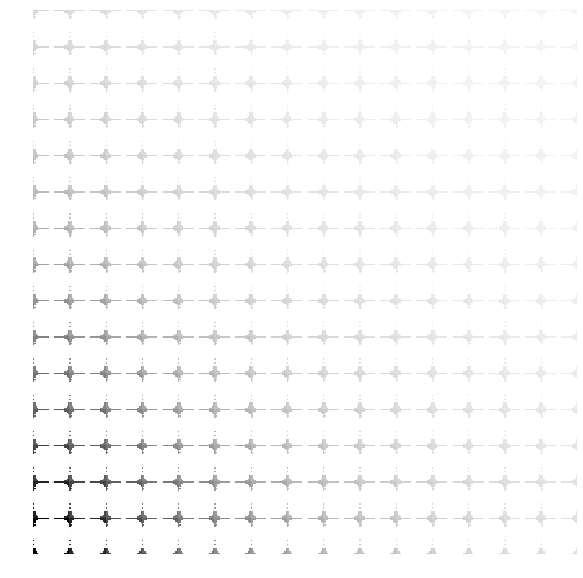

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(figure,cmap='Greys_r')
plt.axis('off')
plt.show()

In [55]:
#建立VAE
enc_1 = Dense(100,activation='sigmoid')

enc_mean = Dense(2)
enc_log_var = Dense(2)

dec_2 = Dense(100,activation='sigmoid')
dec_1 = Dense(784,activation='sigmoid')

In [56]:
x = Input(shape=(784,))
enc_x = enc_1(x)

z_mean = enc_mean(enc_x)
z_log_var = enc_log_var(enc_x)

In [57]:
def sampling(args):
    z_mean,z_log_var = args
    epsilon = K.random_normal(shape=(2,),mean=0,stddev=1)
    return z_mean + K.exp(z_log_var/2)*epsilon

In [58]:
z = Lambda(sampling,output_shape=(2,))([z_mean,z_log_var])

In [61]:
dec_x = dec_2(z)
x_reconstructed = dec_1(dec_x)

In [62]:
VAE = Model(x,x_reconstructed)
VAE.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 100)          78500       input_5[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 2)            202         dense_13[0][0]                   
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 2)            202         dense_13[0][0]                   
__________________________________________________________________________________________________
lambda_1 (

In [67]:
from keras import metrics
def vae_loss(x,x_recon):
    recovery_loss = 784*metrics.binary_crossentropy(x,x_recon)
    k1_loss = -0.5*K.sum(1+z_log_var-K.square(z_mean)-K.exp(z_log_var),axis=-1)
    return recovery_loss + k1_loss

In [68]:
#訓練VAE
VAE.compile(loss=vae_loss,optimizer='Nadam')

In [70]:
VAE.fit(x_train,x_train,batch_size=32,epochs=100)

Epoch 1/100
60000/60000 [==============================] - 32s 530us/step - loss: 189.3358
Epoch 2/100
60000/60000 [==============================] - 27s 457us/step - loss: 178.1939
Epoch 3/100
60000/60000 [==============================] - 32s 537us/step - loss: 171.7889
Epoch 4/100
60000/60000 [==============================] - 21s 353us/step - loss: 166.4152
Epoch 5/100
60000/60000 [==============================] - 27s 447us/step - loss: 163.5633
Epoch 6/100
60000/60000 [==============================] - 21s 352us/step - loss: 161.1151
Epoch 7/100
60000/60000 [==============================] - 18s 306us/step - loss: 159.0546
Epoch 8/100
60000/60000 [==============================] - 20s 334us/step - loss: 157.2575
Epoch 9/100
60000/60000 [==============================] - 19s 309us/step - loss: 155.9166
Epoch 10/100
60000/60000 [==============================] - 20s 326us/step - loss: 154.8599
Epoch 11/100
60000/60000 [==============================] - 20s 331us/step - loss: 154.00

60000/60000 [==============================] - 11s 186us/step - loss: 142.9857
Epoch 90/100
60000/60000 [==============================] - 11s 181us/step - loss: 142.9804
Epoch 91/100
60000/60000 [==============================] - 12s 202us/step - loss: 142.8700
Epoch 92/100
60000/60000 [==============================] - 11s 190us/step - loss: 142.8553
Epoch 93/100
60000/60000 [==============================] - 12s 205us/step - loss: 142.8766
Epoch 94/100
60000/60000 [==============================] - 13s 216us/step - loss: 142.8247
Epoch 95/100
60000/60000 [==============================] - 13s 212us/step - loss: 142.8115
Epoch 96/100
60000/60000 [==============================] - 13s 214us/step - loss: 142.7245
Epoch 97/100
60000/60000 [==============================] - 13s 211us/step - loss: 142.7013
Epoch 98/100
60000/60000 [==============================] - 13s 214us/step - loss: 142.7019
Epoch 99/100
60000/60000 [==============================] - 13s 210us/step - loss: 142.6962
E

In [71]:
VAE_Encoder = Model(x,z_mean)
VAE_Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [72]:
VAE_Decoder = Model(h_input,dec_1(dec_2(h_input)))
VAE_Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_17 (Dense)             (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [73]:
#視覺化encoder
idx = np.random.randint(x_train.shape[0])
print(" 第%d 圖的latent 表示為 %s" %(idx,VAE_Encoder.predict(x_train[idx:idx+1])))

 第55553 圖的latent 表示為 [[ 1.476593  -1.8098981]]


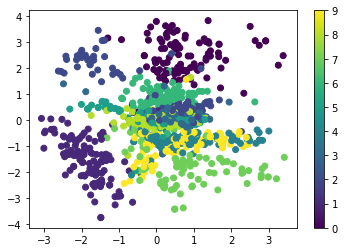

In [74]:
VAE_latents = VAE_Encoder.predict(x_test[idices])
plt.scatter(VAE_latents[:,0],VAE_latents[:,1],c=y_test[idices])
plt.colorbar()
plt.show()

In [75]:
def normalize_to_unit(x):
    x-=x.min()
    x/=x.max()
    return x

In [78]:
grid_x_vae=np.linspace(-4+0.05,4-0.05,n)
grid_y_vae=np.linspace(-4+0.05,4-0.05,n)
VAE_figure = np.zeros((digit_size*n,digit_size*n))
for i,yi in enumerate(grid_x_vae):
    for j,xi in enumerate(grid_y):
        z_sample = np.array([[xi,yi]])
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size,digit_size)
        VAE_figure[(n-i-1)*digit_size:(n-i)*digit_size,j*digit_size:(j+1)*digit_size]=normalize_to_unit(digit)

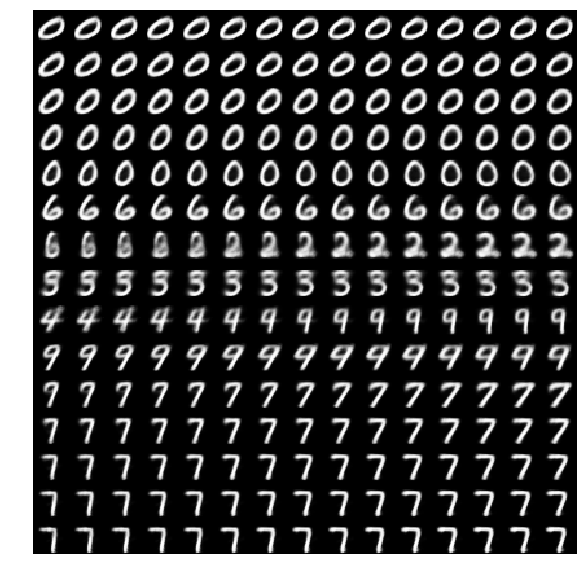

In [79]:
plt.figure(figsize=(10,10))
plt.imshow(VAE_figure,cmap='Greys_r')
plt.axis('off')
plt.show()